# ARIMA Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

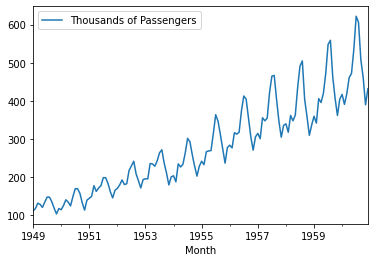

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adf_test(series):
    result=adfuller(series)
    print('p- value: {}'.format(result[1]))
    
    if result[1] <= 0.05:
        print("reject the null hypothesis")
    else:
        print("accept the null hypothesis ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

p- value: 0.9918802434376411
accept the null hypothesis 


In [26]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(2)

In [27]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0


In [28]:
adf_test(df_airline['Passengers First Difference'].dropna())

p- value: 0.03862975767698957
reject the null hypothesis


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


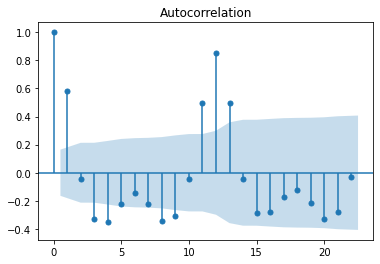

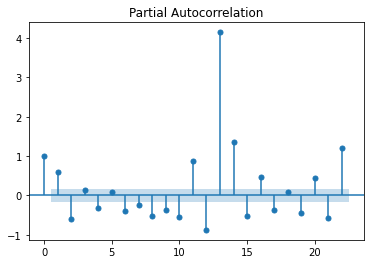

In [30]:
acf = plot_acf(df_airline["Passengers First Difference"].dropna())
pacf = plot_pacf(df_airline["Passengers First Difference"].dropna())

In [31]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0


In [32]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)   # 1/1/1949 to 1/12/1955  (Training)
test_dataset_end=datetime(1960,12,1)    # 1/1/1956 to 1/12/1960  (Testing)

In [33]:
train_data=df_airline[:train_dataset_end]  #1/1/1949 to 1/12/1955

test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]  # 1/1/1956 to 1/12/1960

In [34]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [35]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [36]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [37]:
test_data

,Thousands of Passengers,Passengers First Difference
Month,,
1956-01-01,284.0,47.0
1956-02-01,277.0,-1.0
1956-03-01,317.0,33.0
1956-04-01,313.0,36.0
1956-05-01,318.0,1.0
1956-06-01,374.0,61.0
1956-07-01,413.0,95.0
1956-08-01,405.0,31.0
1956-09-01,355.0,-58.0


In [38]:
## create a ARIMA model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [39]:
train_data

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1955-08-01,347.0,32.0
1955-09-01,312.0,-52.0
1955-10-01,274.0,-73.0


In [40]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(14,2,12))  # (p=14(PACF),d,q(ACF))

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [42]:
test_data

,Thousands of Passengers,Passengers First Difference
Month,,
1956-01-01,284.0,47.0
1956-02-01,277.0,-1.0
1956-03-01,317.0,33.0
1956-04-01,313.0,36.0
1956-05-01,318.0,1.0
1956-06-01,374.0,61.0
1956-07-01,413.0,95.0
1956-08-01,405.0,31.0
1956-09-01,355.0,-58.0


In [43]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [44]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [45]:
pred

1956-01-01    283.900507
1956-02-01    280.432944
1956-03-01    291.166365
1956-04-01    303.324540
1956-05-01    301.673569
1956-06-01    344.709789
1956-07-01    394.057658
1956-08-01    369.481885
1956-09-01    343.822375
1956-10-01    304.887092
1956-11-01    272.435495
1956-12-01    303.274164
1957-01-01    318.152490
1957-02-01    305.091665
1957-03-01    317.783642
1957-04-01    326.538235
1957-05-01    332.005960
1957-06-01    376.188566
1957-07-01    419.297457
1957-08-01    398.057255
1957-09-01    369.289174
1957-10-01    335.491599
1957-11-01    306.909053
1957-12-01    332.385285
1958-01-01    348.732377
1958-02-01    333.494616
1958-03-01    341.928886
1958-04-01    352.888623
1958-05-01    361.370082
1958-06-01    407.447303
1958-07-01    445.160740
1958-08-01    425.846725
1958-09-01    395.729891
1958-10-01    365.901322
1958-11-01    341.003138
1958-12-01    362.566691
1959-01-01    378.225332
1959-02-01    362.090624
1959-03-01    366.504286
1959-04-01    379.384294


In [46]:
residuals

Month
1956-01-01      0.099493
1956-02-01     -3.432944
1956-03-01     25.833635
1956-04-01      9.675460
1956-05-01     16.326431
1956-06-01     29.290211
1956-07-01     18.942342
1956-08-01     35.518115
1956-09-01     11.177625
1956-10-01      1.112908
1956-11-01     -1.435495
1956-12-01      2.725836
1957-01-01     -3.152490
1957-02-01     -4.091665
1957-03-01     38.216358
1957-04-01     21.461765
1957-05-01     22.994040
1957-06-01     45.811434
1957-07-01     45.702543
1957-08-01     68.942745
1957-09-01     34.710826
1957-10-01     11.508401
1957-11-01     -1.909053
1957-12-01      3.614715
1958-01-01     -8.732377
1958-02-01    -15.494616
1958-03-01     20.071114
1958-04-01     -4.888623
1958-05-01      1.629918
1958-06-01     27.552697
1958-07-01     45.839260
1958-08-01     79.153275
1958-09-01      8.270109
1958-10-01     -6.901322
1958-11-01    -31.003138
1958-12-01    -25.566691
1959-01-01    -18.225332
1959-02-01    -20.090624
1959-03-01     39.495714
1959-04-01     16.6

In [47]:
residuals.mean()

22.92492618951535

<AxesSubplot:xlabel='Month'>

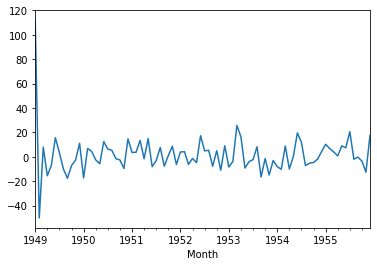

In [48]:
model_Arima_fit.resid.plot()

In [49]:
test_data['Predicted_ARIMA']=pred

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

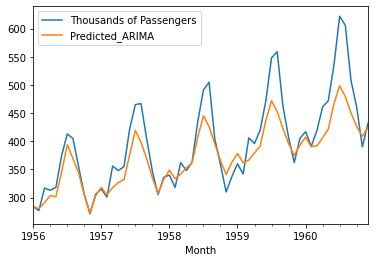

In [50]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [51]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0


In [52]:
df_airline.tail()

,Thousands of Passengers,Passengers First Difference
Month,,
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0
1960-11-01,390.0,-118.0
1960-12-01,432.0,-29.0


In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_airline.index[-1]+ DateOffset(months=x)for x in range(0,25)]

In [54]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_airline.columns)

In [55]:
future_datest_df.head()

,Thousands of Passengers,Passengers First Difference
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN


In [56]:
future_datest_df.tail()

,Thousands of Passengers,Passengers First Difference
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN
1962-12-01,NaN,NaN


In [57]:
future_df=pd.concat([df_airline,future_datest_df])

In [58]:
future_df

,Thousands of Passengers,Passengers First Difference
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


<AxesSubplot:>

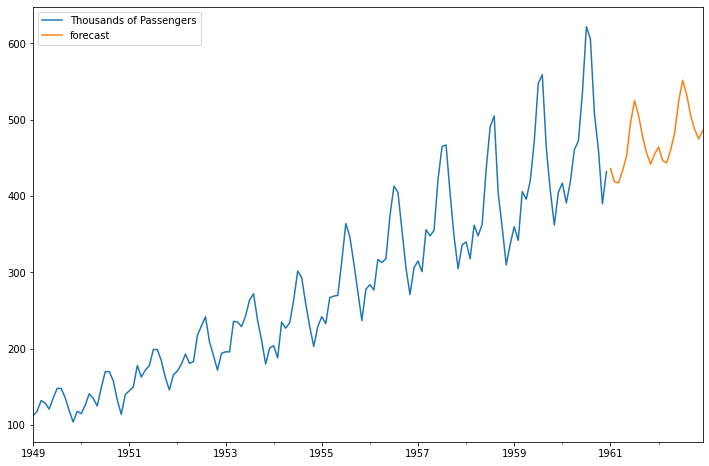

In [59]:
future_df['forecast']=model_Arima_fit.predict(start='1961-01-01',end='1962-12-01')
future_df[['Thousands of Passengers', 'forecast']].plot(figsize=(12, 8)) 

In [60]:
future_df[['Thousands of Passengers', 'forecast']].tail(24)

,Thousands of Passengers,forecast
1961-01-01,NaN,436.013525
1961-02-01,NaN,418.535541
1961-03-01,NaN,417.409388
1961-04-01,NaN,433.046593
1961-05-01,NaN,452.181191
1961-06-01,NaN,495.504019
1961-07-01,NaN,525.362629
1961-08-01,NaN,506.194479
1961-09-01,NaN,478.002233
1961-10-01,NaN,456.802477
